In [6]:
%matplotlib inline 
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X, y = make_regression(n_samples=100, n_features=4,
                       n_informative=2, n_targets=1,
                       random_state=0, shuffle=False)

In [12]:
X[:,0]

array([ 1.76405235,  1.86755799, -0.10321885,  0.76103773,  1.49407907,
       -2.55298982,  2.26975462,  1.53277921, -0.88778575,  1.23029068,
       -1.04855297, -0.50965218, -1.61389785, -0.51080514,  0.06651722,
       -0.67246045,  0.17742614, -0.90729836,  1.13940068, -0.87079715,
       -1.16514984,  1.48825219, -1.07075262,  0.20827498,  0.01050002,
        1.8831507 , -1.17312341,  1.92294203, -0.86122569,  0.94725197,
        0.37642553, -0.69456786,  0.67229476, -0.67433266,  0.57659082,
       -1.49125759,  2.38314477, -1.31590741, -0.74475482,  1.12663592,
       -0.49803245, -1.22543552,  1.18802979,  0.85683061, -0.80340966,
       -0.35399391,  0.62523145, -0.739563  , -0.03928282,  0.77179055,
       -0.36918184,  0.64013153,  0.2799246 ,  0.78632796, -0.01702041,
       -0.955945  , -1.54079701, -0.59731607, -0.54286148,  1.49448454,
       -0.63743703, -0.30901297, -0.81336426,  0.14195316, -0.72559738,
       -1.18885926, -1.93627981, -0.31088617,  1.95591231,  0.49

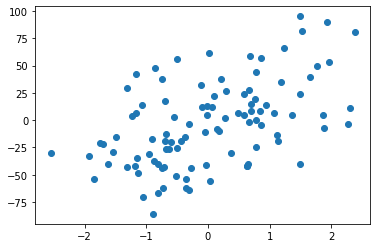

In [17]:
plt.scatter(X[:,0],y)  # first Feature with Target

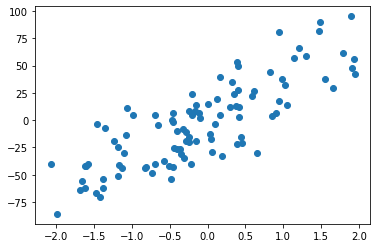

In [14]:
plt.scatter(X[:,1],y) # Second Feature With Target

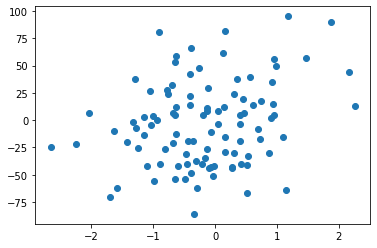

In [18]:
plt.scatter(X[:,2],y) # Third Feature With Target

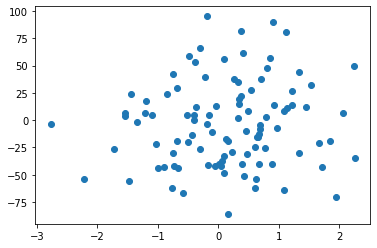

In [19]:
plt.scatter(X[:,3],y) # Fourth Feature With Target

In [21]:
regr = BaggingRegressor(base_estimator=SVR(),
                        n_estimators=10, random_state=0)

In [22]:
regr.fit(X,y)

BaggingRegressor(base_estimator=SVR(), random_state=0)

In [24]:
regr.predict([[0, 0, 0, 0]])

array([-2.87202411])

This example illustrates and compares the bias-variance decomposition of the expected mean squared error of a single estimator against a bagging ensemble.

* In regression, the expected mean squared error of an estimator can be decomposed in terms of bias, variance and noise. On average over datasets of the regression problem, the bias term measures the average amount by which the predictions of the estimator differ from the predictions of the best possible estimator for the problem (i.e., the Bayes model). The variance term measures the variability of the predictions of the estimator when fit over different instances LS of the problem. Finally, the noise measures the irreducible part of the error which is due the variability in the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Settings
n_repeat = 50       # Number of iterations for computing expectations
n_train = 50        # Size of the training set
n_test = 1000       # Size of the test set
noise = 0.1         # Standard deviation of the noise
np.random.seed(0)

In [3]:
estimators = [("Tree", DecisionTreeRegressor()),
              ("Bagging(Tree)", BaggingRegressor(DecisionTreeRegressor()))]

n_estimators = len(estimators)

In [4]:
# Generate data
def f(x):
    x = x.ravel()

    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

In [5]:
def generate(n_samples, noise, n_repeat=1):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)

    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))

        for i in range(n_repeat):
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)

    X = X.reshape((n_samples, 1))

    return X, y

In [6]:
X_train = []
y_train = []

for i in range(n_repeat):
    X, y = generate(n_samples=n_train, noise=noise)
    X_train.append(X)
    y_train.append(y)

In [7]:
X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)

Tree: 0.0255 (error) = 0.0003 (bias^2)  + 0.0152 (var) + 0.0098 (noise)
Bagging(Tree): 0.0196 (error) = 0.0004 (bias^2)  + 0.0092 (var) + 0.0098 (noise)


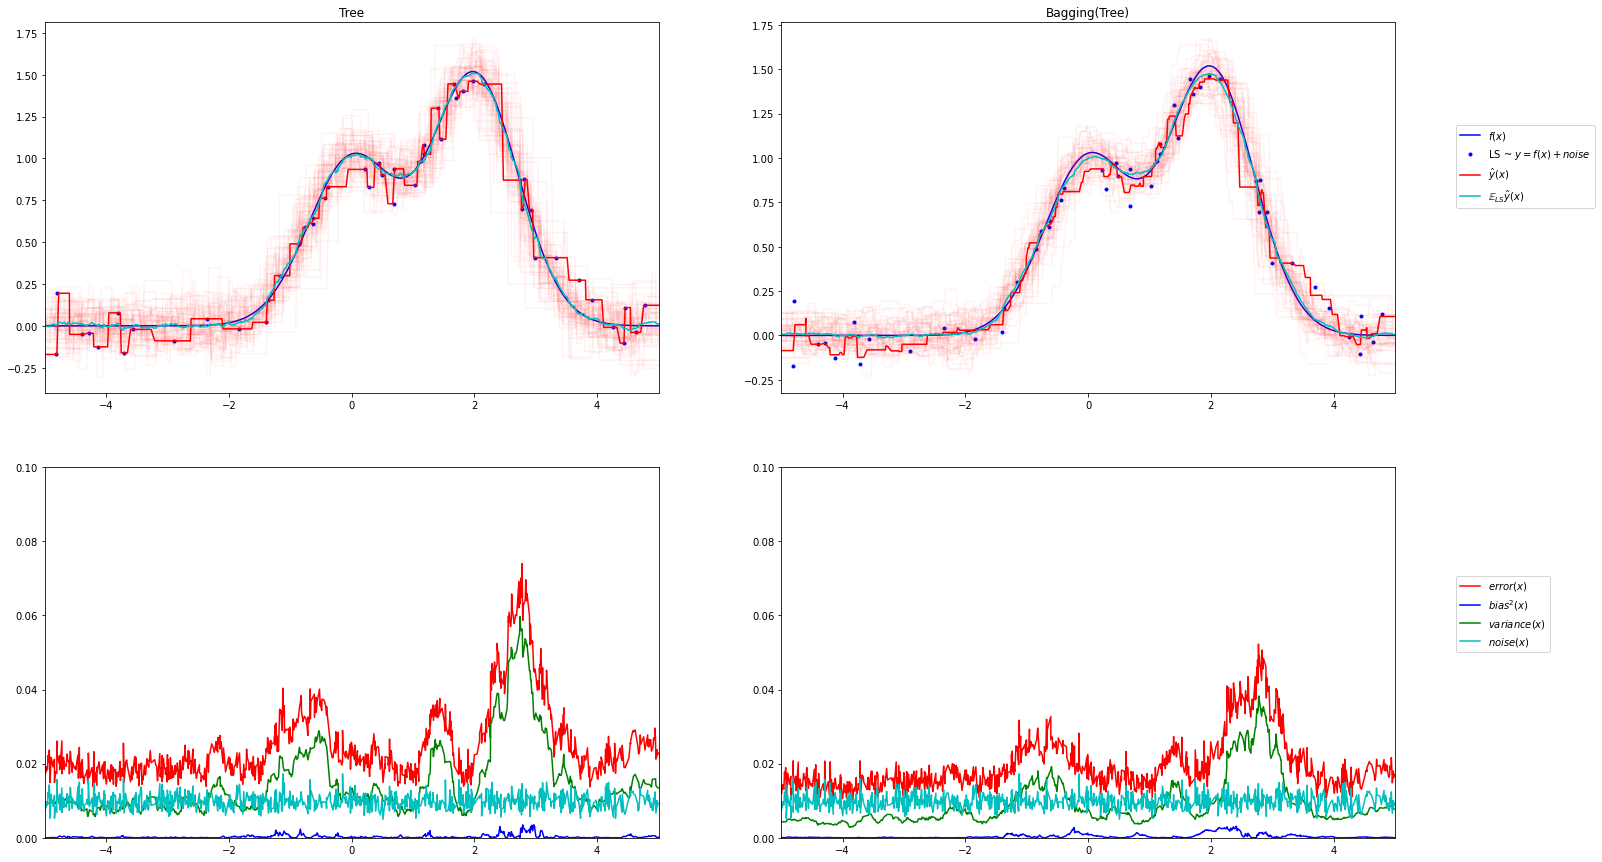

In [9]:

plt.figure(figsize=(30, 15))

# Loop over estimators to compare
for n, (name, estimator) in enumerate(estimators):
    # Compute predictions
    y_predict = np.zeros((n_test, n_repeat))

    for i in range(n_repeat):
        estimator.fit(X_train[i], y_train[i])
        y_predict[:, i] = estimator.predict(X_test)

    # Bias^2 + Variance + Noise decomposition of the mean squared error
    y_error = np.zeros(n_test)

    for i in range(n_repeat):
        for j in range(n_repeat):
            y_error += (y_test[:, j] - y_predict[:, i]) ** 2

    y_error /= (n_repeat * n_repeat)

    y_noise = np.var(y_test, axis=1)
    y_bias = (f(X_test) - np.mean(y_predict, axis=1)) ** 2
    y_var = np.var(y_predict, axis=1)

    print("{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
          " + {3:.4f} (var) + {4:.4f} (noise)".format(name,
                                                      np.mean(y_error),
                                                      np.mean(y_bias),
                                                      np.mean(y_var),
                                                      np.mean(y_noise)))

    # Plot figures
    plt.subplot(2, n_estimators, n + 1)
    plt.plot(X_test, f(X_test), "b", label="$f(x)$")
    plt.plot(X_train[0], y_train[0], ".b", label="LS ~ $y = f(x)+noise$")

    for i in range(n_repeat):
        if i == 0:
            plt.plot(X_test, y_predict[:, i], "r", label=r"$\^y(x)$")
        else:
            plt.plot(X_test, y_predict[:, i], "r", alpha=0.05)

    plt.plot(X_test, np.mean(y_predict, axis=1), "c",
             label=r"$\mathbb{E}_{LS} \^y(x)$")

    plt.xlim([-5, 5])
    plt.title(name)

    if n == n_estimators - 1:
        plt.legend(loc=(1.1, .5))

    plt.subplot(2, n_estimators, n_estimators + n + 1)
    plt.plot(X_test, y_error, "r", label="$error(x)$")
    plt.plot(X_test, y_bias, "b", label="$bias^2(x)$"),
    plt.plot(X_test, y_var, "g", label="$variance(x)$"),
    plt.plot(X_test, y_noise, "c", label="$noise(x)$")

    plt.xlim([-5, 5])
    plt.ylim([0, 0.1])

    if n == n_estimators - 1:

        plt.legend(loc=(1.1, .5))

plt.subplots_adjust(right=.75)
plt.show()